# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искусственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/data.csv',index_col=0)

In [3]:
# Check the data
df.info()

print('Info on the first column')
print(df['x1'].min(), df['x1'].max(), df['x1'].mean(), df['x1'].std())

print('Info on the second column')
print(df['x2'].min(), df['x2'].max(), df['x2'].mean(), df['x2'].std())

print('Info on the classes')
print(df['y'].min(), df['y'].max())
print(np.unique(df['y'], return_counts=True))
# There is a small unbalance

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   y       10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 312.5 KB
Info on the first column
-9.98873237419947 9.985559998492816 -0.029487771608950292 4.981906876906742
Info on the second column
-9.972095496761506 9.982303750413577 -0.09879903982899808 5.0224141058398075
Info on the classes
0 1
(array([0, 1], dtype=int64), array([4903, 5097], dtype=int64))


Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?

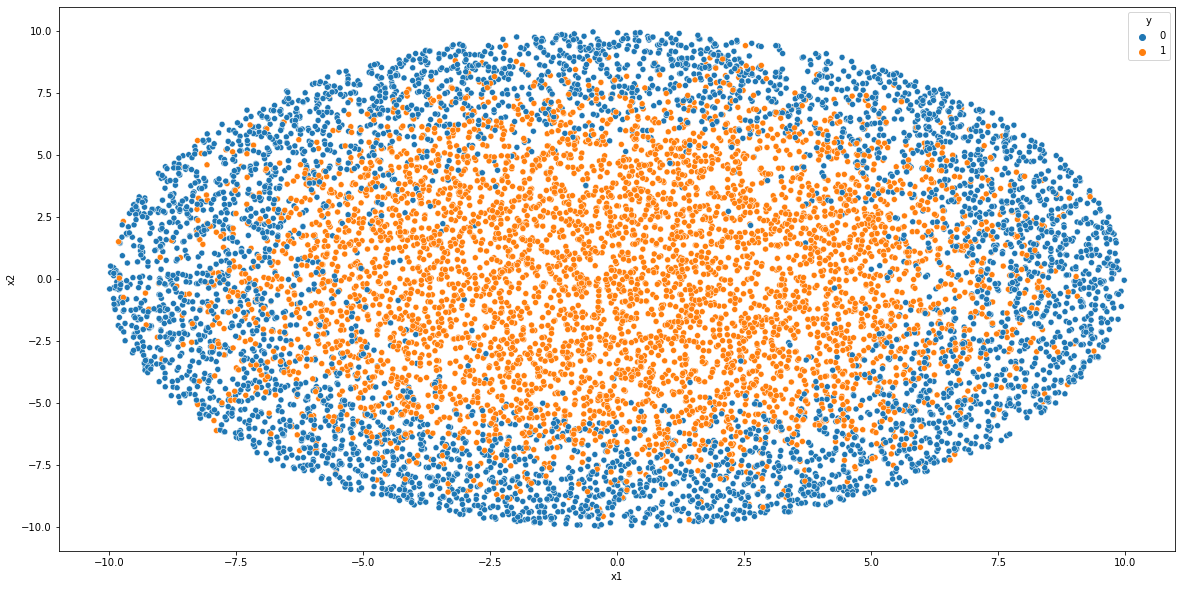

In [4]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
# Note. Using random state to fix results
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33, random_state=8)
print('Examples', X_train.shape, X_test.shape)
print('Labels', y_train.shape, y_test.shape)

Examples (6700, 2) (3300, 2)
Labels (6700,) (3300,)


Final loss (train) 0.6928772335536183
Final loss (test) 0.6927633880893342
Accuracy NNet (train) 0.596865671641791
Accuracy NNet (test) 0.6036363636363636


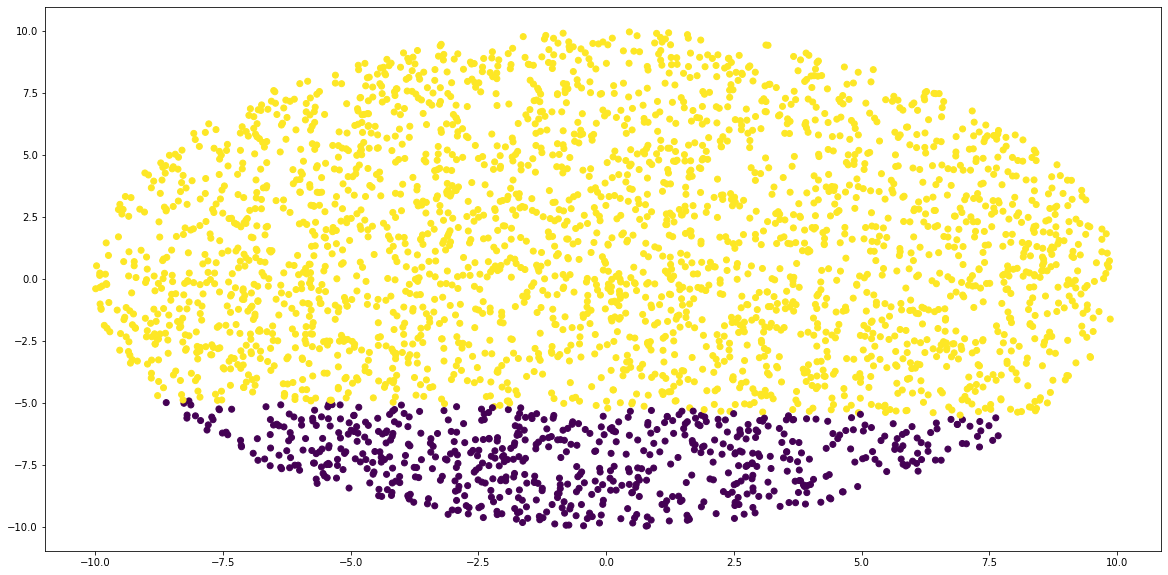

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

#########################################
# Ваш код для Логистической регрессии

log_reg = LogisticRegression(multi_class='multinomial')
log_reg.fit(X=X_train, y=y_train)

predict_logit_train =  log_reg.predict(X_train)
predict_logit_test =  log_reg.predict(X_test)

print('Final loss (train)', log_loss(y_true=y_train, y_pred=log_reg.predict_proba(X_train)))
print('Final loss (test)', log_loss(y_true=y_test, y_pred=log_reg.predict_proba(X_test)))

print('Accuracy NNet (train)', accuracy_score(y_train, predict_logit_train))
print('Accuracy NNet (test)', accuracy_score(y_test, predict_logit_test))

#########################################

# Заодно визуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(x=X_test['x1'], y=X_test['x2'], c = predict_logit_test)
plt.show()


Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Final loss (train) 0.6928772335652005
Final loss (test) 0.6927633906291619
Accuracy NNet (train) 0.5970149253731343
Accuracy NNet (test) 0.6036363636363636


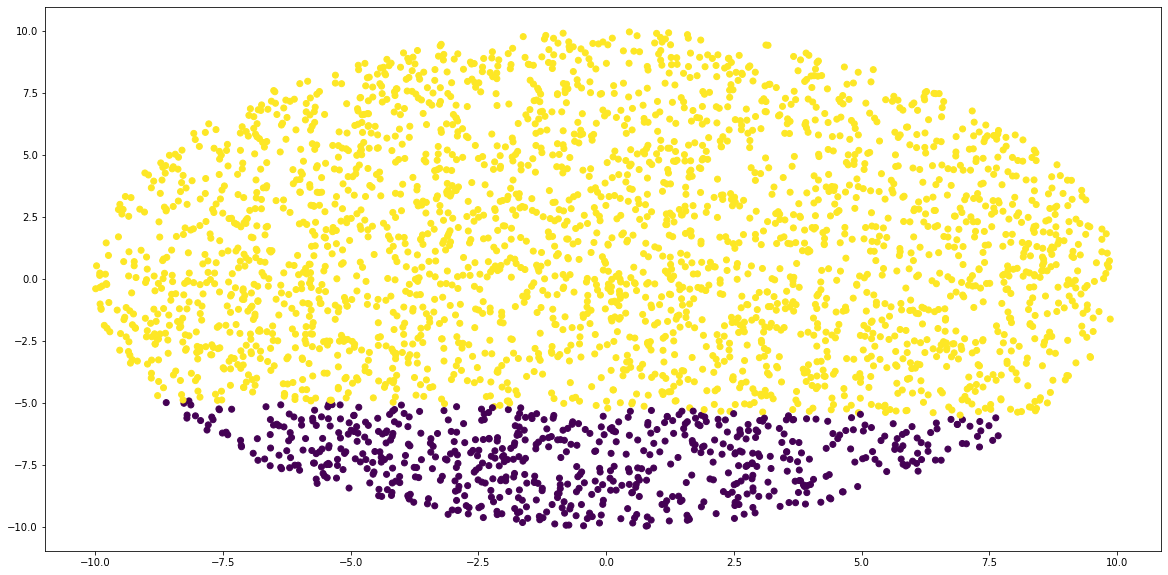

In [7]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Note. Choosing optimal parameters is performed on a train dataset
# Note. Division is set to be the same in order to compare results
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)

log_reg_scaled = LogisticRegression(multi_class='multinomial')
log_reg_scaled.fit(X=X_train_new, y=y_train)

predict_logit_new_train =  log_reg_scaled.predict(X_train_new)
predict_logit_new_test =  log_reg_scaled.predict(X_test_new)

print('Final loss (train)', log_loss(y_true=y_train, y_pred=log_reg_scaled.predict_proba(X_train_new)))
print('Final loss (test)', log_loss(y_true=y_test, y_pred=log_reg_scaled.predict_proba(X_test_new)))

print('Accuracy NNet (train)', accuracy_score(y_train, predict_logit_new_train))
print('Accuracy NNet (test)', accuracy_score(y_test, predict_logit_new_test))

#########################################

# Заодно визуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(x=X_test['x1'], y=X_test['x2'], c = predict_logit_new_test)
plt.show()


Переходим к следующему классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение?

Accuracy DTree (train) 1.0
Accuracy DTree (test) 0.7560606060606061


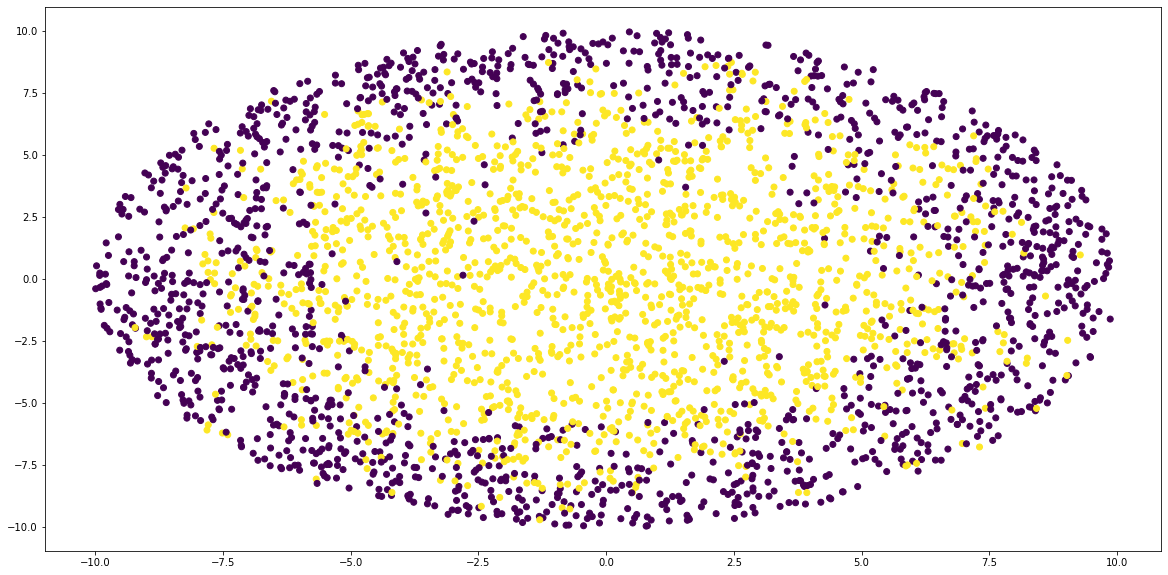

In [8]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код

predict_tree = DecisionTreeClassifier()
predict_tree.fit(X=X_train_new, y=y_train)

predict_tree_proba_train = predict_tree.predict_proba(X_train_new).argmax(axis=-1)
predict_tree_proba_test = predict_tree.predict_proba(X_test_new).argmax(axis=-1)

print('Accuracy DTree (train)', accuracy_score(y_train, predict_tree_proba_train))
print('Accuracy DTree (test)', accuracy_score(y_test, predict_tree_proba_test))

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba_test)
plt.show()


Поможет ли в данном случае ансамбль? Когда в целом ансамбль дает хорошие результаты?

Ответ: в случае, когда классификаторы не коррелированны

Accuracy RandomForest (train) 0.9998507462686567
Accuracy RandomForest (test) 0.8045454545454546


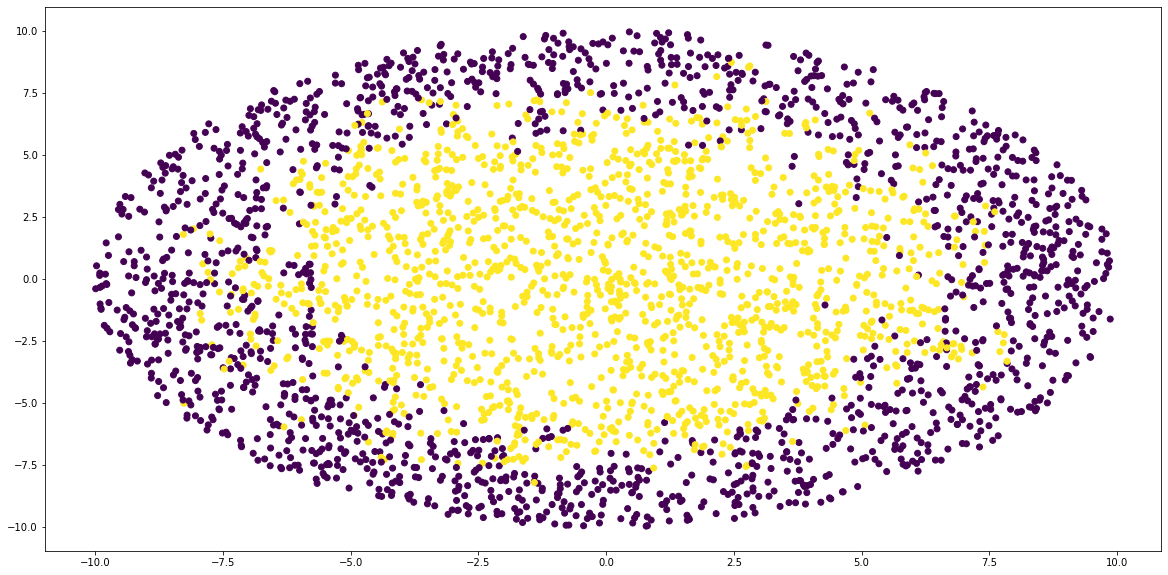

In [9]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код

predict_forest = RandomForestClassifier(n_estimators=100, max_depth=None)

predict_forest.fit(X_train_new, y_train)

predict_forest_proba_train = predict_forest.predict_proba(X_train_new).argmax(axis=-1)
predict_forest_proba_test = predict_forest.predict_proba(X_test_new).argmax(axis=-1)

print('Accuracy RandomForest (train)', accuracy_score(y_train, predict_forest_proba_train))
print('Accuracy RandomForest (test)', accuracy_score(y_test, predict_forest_proba_test))

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba_test)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадки и копипастим все нужное сюда!

In [10]:
# Подгружаем понравившийся фраемворк 
# Собираем сетку
# Учим и радуемся!

(6700,) (3300,)
Accuracy NNet (train) 0.8355223880597015
Accuracy NNet (test) 0.8424242424242424


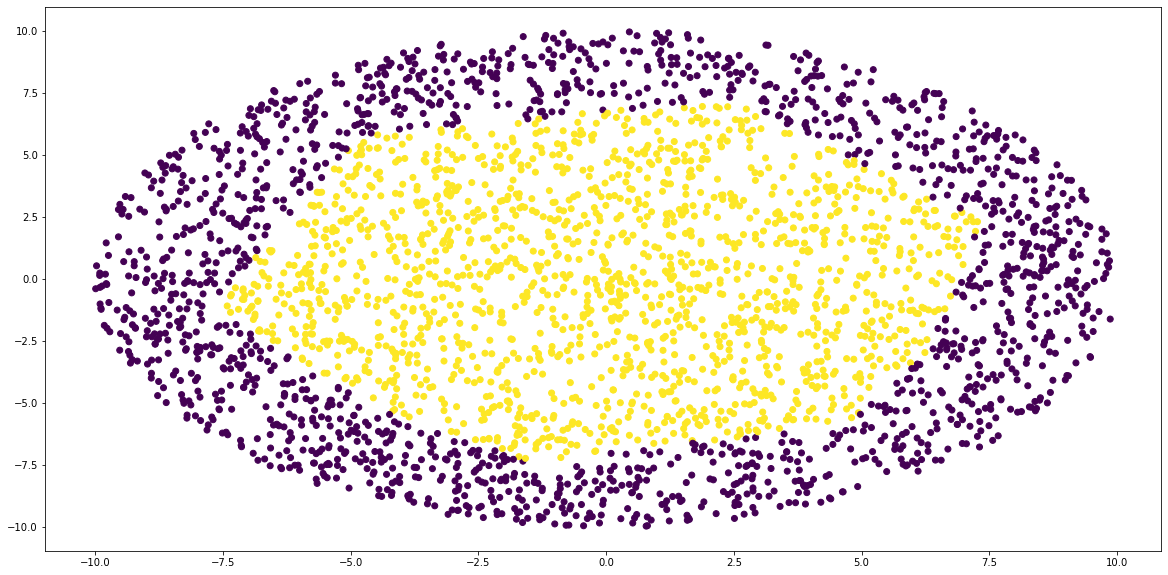

In [11]:
from sklearn.neural_network import MLPClassifier

#########################################
# Ваш код

predict_neural = MLPClassifier(hidden_layer_sizes=(5, 5), activation='relu', solver='adam', learning_rate='constant')
predict_neural.fit(X_train_new, y_train)

predict_classes_train = predict_neural.predict(X_train_new)
predict_classes_test = predict_neural.predict(X_test_new)

print(predict_classes_train.shape, predict_classes_test.shape)

print('Accuracy NNet (train)', accuracy_score(y_train, predict_classes_train))
print('Accuracy NNet (test)', accuracy_score(y_test, predict_classes_test))

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_classes_test)
plt.show()

На этом наше приключение сегодня закончилось. Вопросы максимально желательны :)
